In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import torch
import torch.nn as nn
import torchvision.models as models
import tensorflow as tf
import os
from torchvision import transforms
from PIL import Image
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import itertools

**DECLARE THE WORKDIR HERE**

In [75]:
folder = '/content/drive/My Drive/PROJECTE DEEP LEARNING/'

In [76]:
folder_images = folder + 'IMAGES_OF_Vincent van Gogh4Train/'

# Artists Classifier (overfitting)

In [77]:
# Define the number of classes (replace NUM_ARTISTS with your actual number of classes)
NUM_ARTISTS = 100  # Example, change it to the actual number of classes

# Load the pretrained DenseNet169 model
artists_classifier = models.densenet169(pretrained=True)

# Freeze all layers in the model
for param in artists_classifier.parameters():
    param.requires_grad = False

# Add Dropout to the fully connected layer
num_ftrs = artists_classifier.classifier.in_features
artists_classifier.classifier = nn.Sequential(
    nn.BatchNorm1d(num_ftrs),  # Add Batch Normalization
    nn.Dropout(0.5),           # Add Dropout with 50% probability
    nn.Linear(num_ftrs, NUM_ARTISTS)  # Add a Linear layer with the number of classes
)

# Ensure the classifier parameters require gradients
for param in artists_classifier.classifier.parameters():
    param.requires_grad = True

# Define the device to use (GPU if available, else CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Move the model to the defined device
artists_classifier.to(device)

# Define the path to the weights file
weights_path = folder + 'pre_densenet169_weights74.pth'

# Load the weights into the model
artists_classifier.load_state_dict(torch.load(weights_path))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

# Order by Date (Classifier)

In [78]:
date_classifier =  tf.keras.models.load_model(folder+"VGG16_Vincent_van_gogh.h5") # vgg16_Order_by_data VGG16_Vincent_van_gogh Resnet18_ALL

# Order by Date (Metric Learning)

In [79]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        resnet = models.resnet50(pretrained=True)

        # Congelar los pesos de todas las capas
        for param in resnet.parameters():
            param.requires_grad = False

        # Descongelar la última capa y la antepenúltima capa
        for param in list(resnet.layer4.parameters()) + list(resnet.avgpool.parameters()) + list(resnet.fc.parameters()):
            param.requires_grad = True

        # Reemplazar la capa lineal final para ajustarse a nuestro número de clases
        num_ftrs = resnet.fc.in_features
        resnet.fc = nn.Linear(num_ftrs, num_classes)

        # Guardar la red resnet modificada en self.resnet
        self.resnet = resnet

    def forward(self, x):
        x = self.resnet(x)
        return x

In [80]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Crear una instancia del modelo
model = Net(13)

# Mover el modelo al dispositivo definido
model.to(device)

# Definir la ruta al archivo de pesos
weights_path = folder + 'Metric_van_gogh_weights.pth'

# Cargar los pesos en el modelo
model.load_state_dict(torch.load(weights_path))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

# Example of execution:

**PREDICT THE ARTIST**

In [81]:
# List to pass from ordinal to artist name
idx2artist = ['Ivan Aivazovsky', 'Lucas Cranach the Elder', 'William Turner', 'Henri de Toulouse-Lautrec', 'Konstantin Somov', 'Gustave Caillebotte', 'Ferdinand Hodler', 'Koloman Moser', 'William-Adolphe Bouguereau', 'Thomas Eakins', 'Ernst Ludwig Kirchner', 'Joshua Reynolds', 'Theo van Rysselberghe', 'William Merritt Chase', 'Edgar Degas', 'Claude Monet', 'Valentin Serov', 'Felix Vallotton ', 'Pierre-Auguste Renoir', 'Rembrandt', 'Francisco Goya', 'Theophile Steinlen', 'Tintoretto', 'Orest Kiprensky', 'Joan Miro', 'Alfred Sisley', 'Ivan Bilibin', 'Dante Gabriel Rossetti', 'Sir Lawrence Alma-Tadema', 'Berthe Morisot', 'Albrecht Durer', 'Titian', 'Ivan Shishkin', 'Leonardo da Vinci', 'Camille Corot', 'Childe Hassam', 'Raphael Kirchner', 'James Tissot', 'Odilon Redon', 'Vasily Vereshchagin', 'Eugene Boudin', 'Paul Cezanne', 'John Singer Sargent', 'Vasily Surikov', 'Vincent van Gogh', 'Georges Braque', 'Eugene Delacroix', 'Isaac Levitan', 'Louis Comfort Tiffany', 'David Burliuk', 'Camille Pissarro', 'Gustave Courbet', 'Fernand Leger', 'Jean Auguste Dominique Ingres', 'Amedeo Modigliani', 'Henri Fantin-Latour', 'Edouard Manet', 'Robert Henri', 'Konstantin Yuon', 'Peter Paul Rubens', 'Sam Francis', 'Boris Kustodiev', 'Mary Cassatt', 'Kuzma Petrov-Vodkin', 'John Henry Twachtman', 'Egon Schiele', 'Nicholas Roerich', 'James McNeill Whistler', 'Paul Klee', 'Pyotr Konchalovsky', 'Ilya Repin', 'Pierre Bonnard', 'M.C. Escher', 'Maurice Prendergast', 'Salvador Dali', 'Pablo Picasso', 'Konstantin Makovsky', 'Ilya Mashkov', 'Vasily Polenov', 'Rene Magritte', 'Henri Matisse', ' Wassily Kandinsky', 'Max Ernst', 'Marc Chagall', 'Edvard Munch', 'Albert Bierstadt', 'Aleksey Savrasov', 'Zinaida Serebriakova', 'Karl Bryullov', 'Paul Gauguin', 'Gene Davis', 'Konstantin Korovin', 'Lucian Freud', 'Eyvind Earle', 'Charles Turner', 'Martiros Saryan', 'Gustave Loiseau', 'Samuel Peploe', 'Charles M. Russell', 'George Stefanescu-Ramnic ']

In [82]:
# List to store the predictions
predictions = []

# Transformations to preprocess the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.5187403559684753, 0.4694617986679077, 0.4069422781467438],  # Normalize the image
                         std=[0.21124403178691864, 0.20092765986919403, 0.18979398906230927])
])

# Get the list of file names in the folder
image_files = os.listdir(folder_images)

# Iterate over each image file
for file_name in image_files:
    # Build the full path to the image
    image_path = os.path.join(folder_images, file_name)

    # Open the image
    image = Image.open(image_path)

    # Apply the transformations
    image = transform(image)

    # Add a dimension to the tensor to represent the batch of images
    image = image.unsqueeze(0)

    # Move the tensor to the GPU if available
    image = image.to(device)

    # Set the model to evaluation mode
    artists_classifier.eval()

    # Turn off gradient calculation
    with torch.no_grad():
        # Make a prediction
        output = artists_classifier(image)

        # Get the predicted probabilities and predicted class
        probabilities = torch.softmax(output, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()

        # Add the predicted class to the predictions list
        predictions.append(predicted_class)

In [83]:
# Calculate the frequency of each element in the list
prediction_counts = Counter(predictions)

# Get the most common value and its frequency
most_common_prediction, frequency = prediction_counts.most_common(1)[0]

# Calculate the repetition percentage
percentage = (frequency / len(predictions)) * 100

print("The most common value is '{}' with a repetition percentage of {:.2f}%".format(most_common_prediction, percentage))
print("ARTIST PREDICTED:", idx2artist[most_common_prediction])

The most common value is '44' with a repetition percentage of 50.00%
ARTIST PREDICTED: Vincent van Gogh


In [84]:
sorted_prediction_counts = dict(prediction_counts.most_common())

for i in sorted_prediction_counts.items():
  print("ARTIST", idx2artist[i[0]], "predicted:", i[1], "times")

ARTIST Vincent van Gogh predicted: 2 times
ARTIST Francisco Goya predicted: 1 times
ARTIST Felix Vallotton  predicted: 1 times


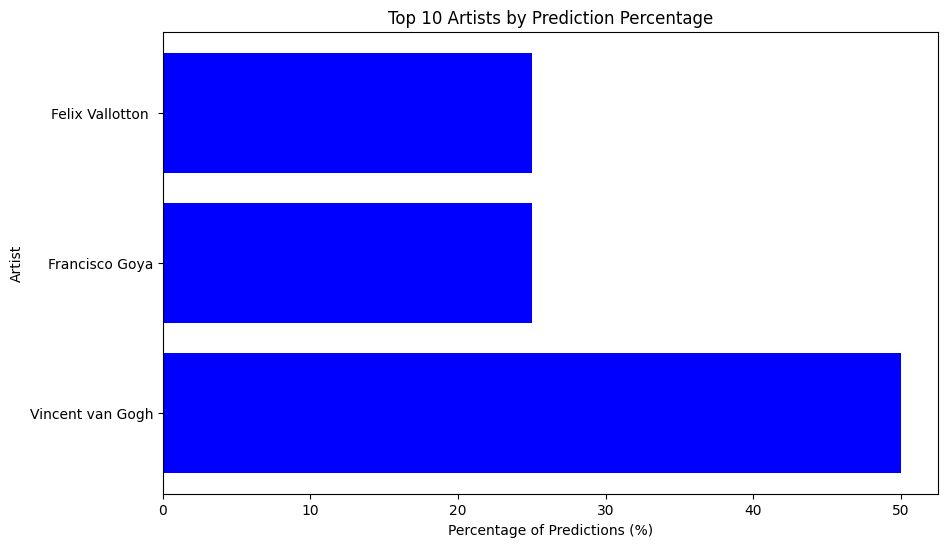

In [85]:
total_predictions = sum(prediction_counts.values())
percentage_counts = {idx: (count / total_predictions) * 100 for idx, count in prediction_counts.items()}
sorted_percentage_counts = sorted(percentage_counts.items(), key=lambda item: item[1], reverse=True)

# Extraer los datos necesarios para la gráfica
top_10_percentages = list(sorted_percentage_counts)[:10]  # Tomar solo los primeros 10 elementos
labels = [idx2artist[idx] for idx, _ in top_10_percentages]
percentages = [percentage for _, percentage in top_10_percentages]

# Crear la gráfica de barras horizontales
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura si es necesario
plt.barh(labels, percentages, color='blue')  # Cambiar el color según prefieras

# Títulos y etiquetas en inglés
plt.title('Top 10 Artists by Prediction Percentage')
plt.xlabel('Percentage of Predictions (%)')
plt.ylabel('Artist')

# Mostrar la gráfica
plt.show()

**ORDER THE IMAGES BY DATE (Classification NET)**

In [86]:
ll_results = []

# Define la función load_image
def load_image(image_path, means=None, stds=None):
    image = Image.open(image_path)
    image = np.array(image) / 255.0  # Normalize

    # Normalize using means and stds
    if means is not None and stds is not None:
        image = (image - means) / stds

    return image


# Obtener la lista de nombres de archivos en la carpeta
image_files = os.listdir(folder_images)

# Crear un diccionario para contar el orden de las imágenes
image_order_count = {image: 0 for image in image_files}

# Normalization parameters
means = np.array([0.5187403559684753, 0.4694617986679077, 0.4069422781467438])
stds = np.array([0.21124403178691864, 0.20092765986919403, 0.18979398906230927])

image_pairs = list(itertools.combinations(image_files, 2))

# Compare each image with all other images using the date classifier
for i in image_pairs:
    name_image1 = i[0]
    name_image2 = i[1]

    image1_path = os.path.join(folder_images, name_image1)
    image2_path = os.path.join(folder_images, name_image2)

    # Load and preprocess the images
    image1 = load_image(image1_path, means, stds)
    image2 = load_image(image2_path, means, stds)

    # Convert images to the format expected by the date classifier
    image1 = image1[np.newaxis, ...]  # Add batch dimension
    image2 = image2[np.newaxis, ...]  # Add batch dimension

    # Here, we're assuming date_classifier is the provided TensorFlow model
    result_order = date_classifier.predict([image1, image2])[0][0]
    # Increment the corresponding counter if the first image is older
    if result_order < 0.5:  # Assuming result_order < 0.5 indicates image1 is older
        image_order_count[name_image1] += (1-result_order)
    else:
        image_order_count[name_image2] += result_order

    ll_results.append((name_image1, name_image2, result_order))

# Ordenar el diccionario por valores de mayor a menor
sorted_image_scores = dict(sorted(image_order_count.items(), key=lambda item: item[1], reverse=True))
sorted_images = list(sorted_image_scores.keys())

# Imprimir las imágenes ordenadas
print(sorted_images)

1/1 [==============================] - 0s 38ms/step
['59409.jpg', '23522.jpg', '56913.jpg', '92653.jpg']


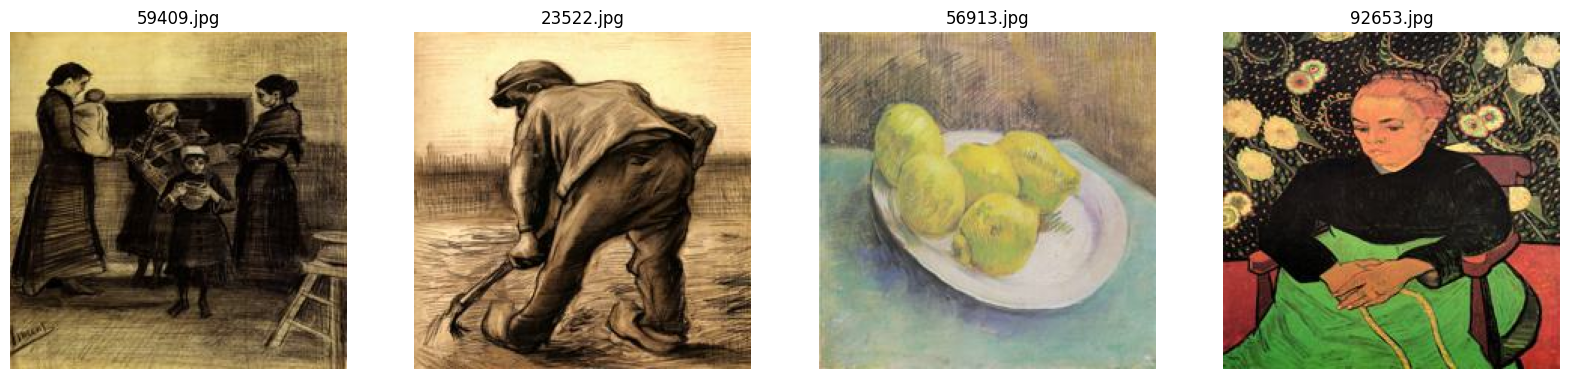

In [87]:
def visualize_images(image_names):
    num_images = len(image_names)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 5, 5))

    for i, image_name in enumerate(image_names):
        image_path = os.path.join(folder_images, image_name)
        image = Image.open(image_path)

        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_name, fontsize=12)

    plt.show()


visualize_images(sorted_images)

# Verify the artist and real chronological order

TE REAL ARTIST IS: Vincent van Gogh


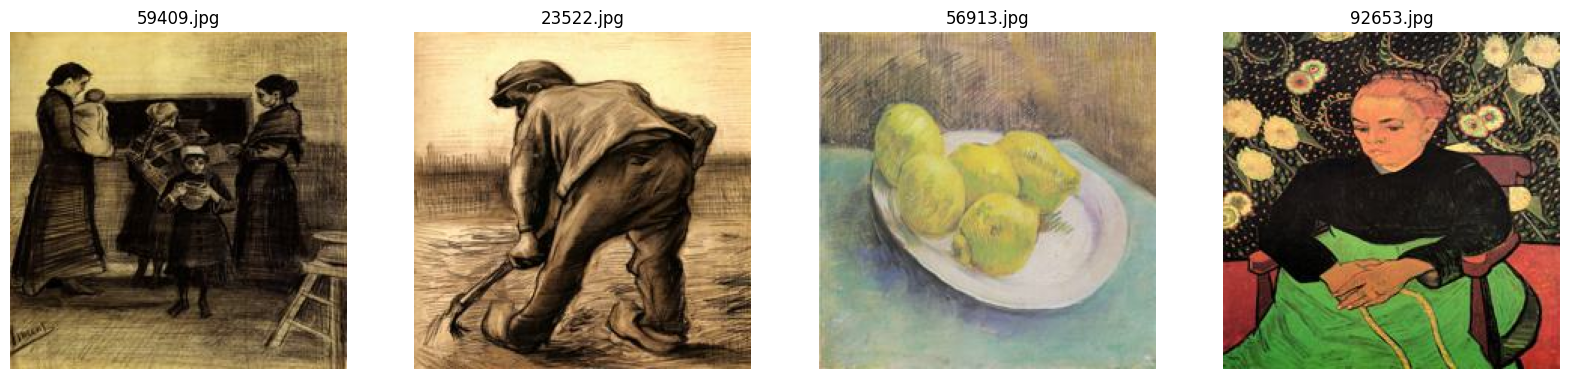

In [88]:
df = pd.read_csv(folder+'IMAGES_OF_Vincent van Gogh4Train.csv')
print("TE REAL ARTIST IS:",df['artist'].tolist()[0])
df_sorted = df.sort_values(by='date')
real_order = df_sorted['new_filename'].tolist()
visualize_images(real_order)

In [89]:
count = 0
for i,j in zip(real_order, sorted_images):
  if i == j:
    count += 1

print(str(count)+"/"+str(len(real_order)))
print("Acc:", str((count/len(real_order) * 100))+"%")

4/4
Acc: 100.0%


In [90]:
good = 0
for img1, img2, res in ll_results:
    # Obtener las fechas de las imágenes
    date1 = df[df['new_filename'] == img1]['date'].values[0]
    date2 = df[df['new_filename'] == img2]['date'].values[0]

    # Comparar las fechas y verificar el resultado
    if date1 > date2 and res > 0.5:
        good += 1
    elif date1 < date2 and res <= 0.5:
        good += 1

print("Good predictions:", str(good)+"/"+str(len(ll_results)))
print("Accuracy for pairs:", str((good*100)/len(ll_results))+"%")

Good predictions: 6/6
Accuracy for pairs: 100.0%


**ORDER THE IMAGES BY DATE (Metric Learning)**

In [91]:
idx2date = [1887,1886, 1890, 1889, 1885, 1888, 1884, 1883,1882, 1879, 1881, 1873, 1878]

In [92]:
def predict(model, image):
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return predicted

In [93]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

ll_results = []

# Predict the date for each class
for image_name in os.listdir(folder_images):
    image_path = os.path.join(folder_images, image_name)
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)  # Apply transformations and add batch dimension
    prediction = predict(model, image)
    prediction = idx2date[prediction.item()]
    ll_results.append((image_name, prediction))
    print(f'Image: {image_name}, Prediction: {prediction}')

# Order
sorted_ll_results = sorted(ll_results, key=lambda x: x[1])

Image: 59409.jpg, Prediction: 1878
Image: 56913.jpg, Prediction: 1888
Image: 23522.jpg, Prediction: 1873
Image: 92653.jpg, Prediction: 1883


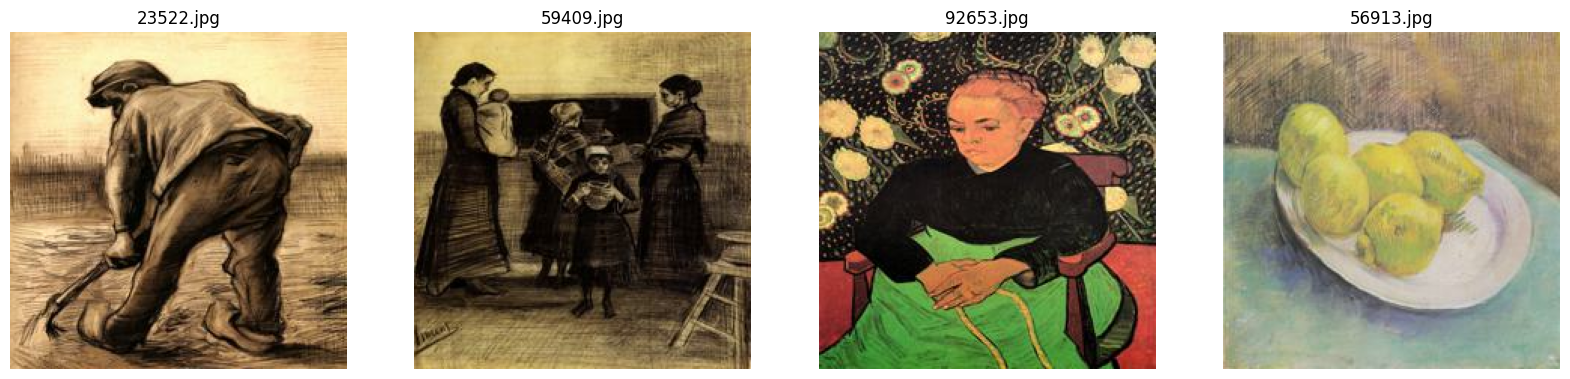

In [94]:
sorted_images = [i[0] for i in sorted_ll_results]
visualize_images(sorted_images)

# Verify the artist and real chronological order

TE REAL ARTIST IS: Vincent van Gogh


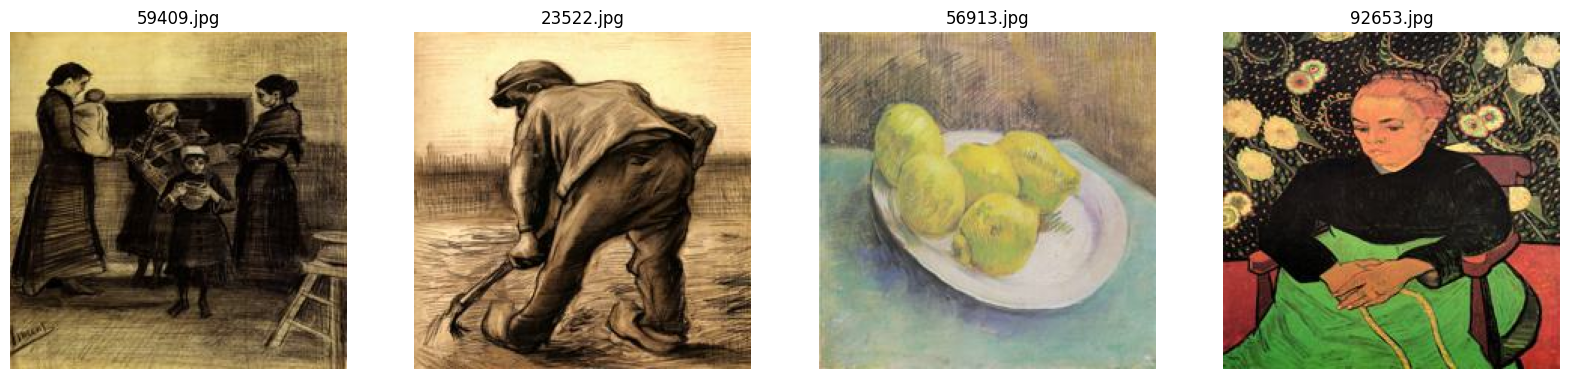

In [95]:
df = pd.read_csv(folder+'IMAGES_OF_Vincent van Gogh4Train.csv')
print("TE REAL ARTIST IS:",df['artist'].tolist()[0])
df_sorted = df.sort_values(by='date')
real_order = df_sorted['new_filename'].tolist()
visualize_images(real_order)

In [96]:
count = 0
for i,j in zip(real_order, sorted_images):
  if i == j:
    count += 1

print(str(count)+"/"+str(len(real_order)))
print("Acc:", str((count/len(real_order) * 100))+"%")

0/4
Acc: 0.0%


In [97]:
df

artist  date new_filename
0  Vincent van Gogh  1887    56913.jpg
1  Vincent van Gogh  1885    23522.jpg
2  Vincent van Gogh  1883    59409.jpg
3  Vincent van Gogh  1889    92653.jpg

In [98]:
good = 0
ll_differences = []
date_results = []
for img, pred_date in ll_results:
  real_date = df[df['new_filename'] == img]['date'].values[0]
  if pred_date == real_date:
    good += 1
  ll_differences.append(abs(real_date - pred_date))
  date_results.append((real_date,pred_date))
  print(img+":"+"Real Date: "+str(real_date)+" Pred Date: "+str(pred_date))


59409.jpg:Real Date: 1883 Pred Date: 1878
56913.jpg:Real Date: 1887 Pred Date: 1888
23522.jpg:Real Date: 1885 Pred Date: 1873
92653.jpg:Real Date: 1889 Pred Date: 1883


In [99]:
print("Good classifications:", str(good)+"/"+str(len(ll_results)))
print("Accuracy for classifications:", str((good*100)/len(ll_results))+"%")

Good classifications: 0/4
Accuracy for classifications: 0.0%


In [100]:
print("MAE:", sum(ll_differences)/len(ll_differences))

MAE: 6.0


In [101]:

error_per_date = defaultdict(list)

# Calcular el error absoluto para cada tupla y agruparlo por fecha
for real_date, pred_date in date_results:
    absolute_error = abs(real_date - pred_date)
    error_per_date[real_date].append(absolute_error)

# Calcular el MAE para cada fecha
mae_per_date = {date: sum(errors) / len(errors) for date, errors in error_per_date.items()}

# Imprimir el MAE para cada fecha
for date, mae in mae_per_date.items():
    print(f"Date: {date}, MAE: {mae}")

Date: 1883, MAE: 5.0
Date: 1887, MAE: 1.0
Date: 1885, MAE: 12.0
Date: 1889, MAE: 6.0
